# Data Analysis and Visualizations for Movies

## 1.Understand and Explore the DataSet
### Code: 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix_titles.csv') 

print("First 5 rows of the dataset:")
display(df.head())

print("Dataset information:")
df.info()

print("Statistical summary:")
display(df.describe())


First 5 rows of the dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Statistical summary:


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Output/Observations:

#### Feature Descriptions:
 - **show_id**: Unique identifier for each show
 - **type**: Type of content (e.g., Movie or TV Show)
 - **title**: Title of the content
 - **director**: Name of the director, with some missing values
 - **cast**: List of main actors, with some missing values
 - **country**: Country of origin, with some missing values
 - **date_added**: Date when the content was added to Netflix, with some missing values
 - **release_year**: Year the content was released
 - **rating**: Audience rating of the content, with some missing values
 - **duration**: Duration of the content in minutes or seasons, with some missing values
 - **listed_in**: Categories or genres the content belongs to
 - **description**: Brief description of the content

#### Data Types (based on df.info()):
 - **show_id**: Object
 - **type**: Object (Categorical)
 - **title**: Object (Categorical)
 - **director**: Object (Categorical)
 - **cast**: Object (Categorical)
 - **country**: Object (Categorical)
 - **date_added**: Object (Categorical)
 - **release_year**: Integer
 - **rating**: Object (Categorical)
 - **duration**: Object (Categorical)
 - **listed_in**: Object (Categorical)
 - **description**: Object (Categorical)

#### Missing Values:
The output from `df.info()` will indicate if any columns have missing values, allowing us to identify where data cleaning may be necessary. A column with missing values will show up with a count lower than the total number of entries.

#### Summary Statistics (based on `df.describe()`):
The output - **Mean** (average values for features like release_year, duration)
- **Standard Deviation** (how much the data varies from the mean)
- **Minimum and Maximum Values** (ranges of each feature)




## 2. Checking for Missing Data
### Code:

Missing values in each column:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


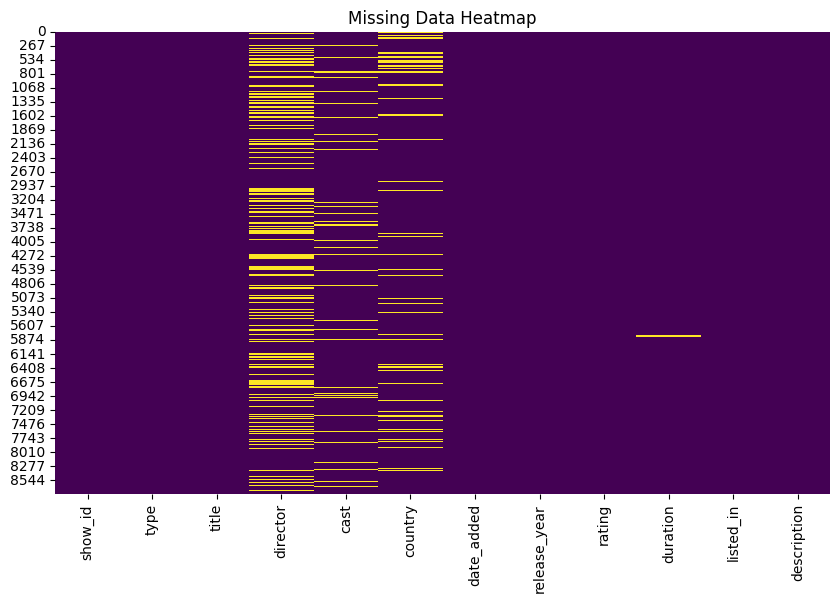

In [7]:
missing_data = df.isnull().sum()
print("Missing values in each column:\n", missing_data)

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

## 3. Handling Missing Data and Outliers
### Code:

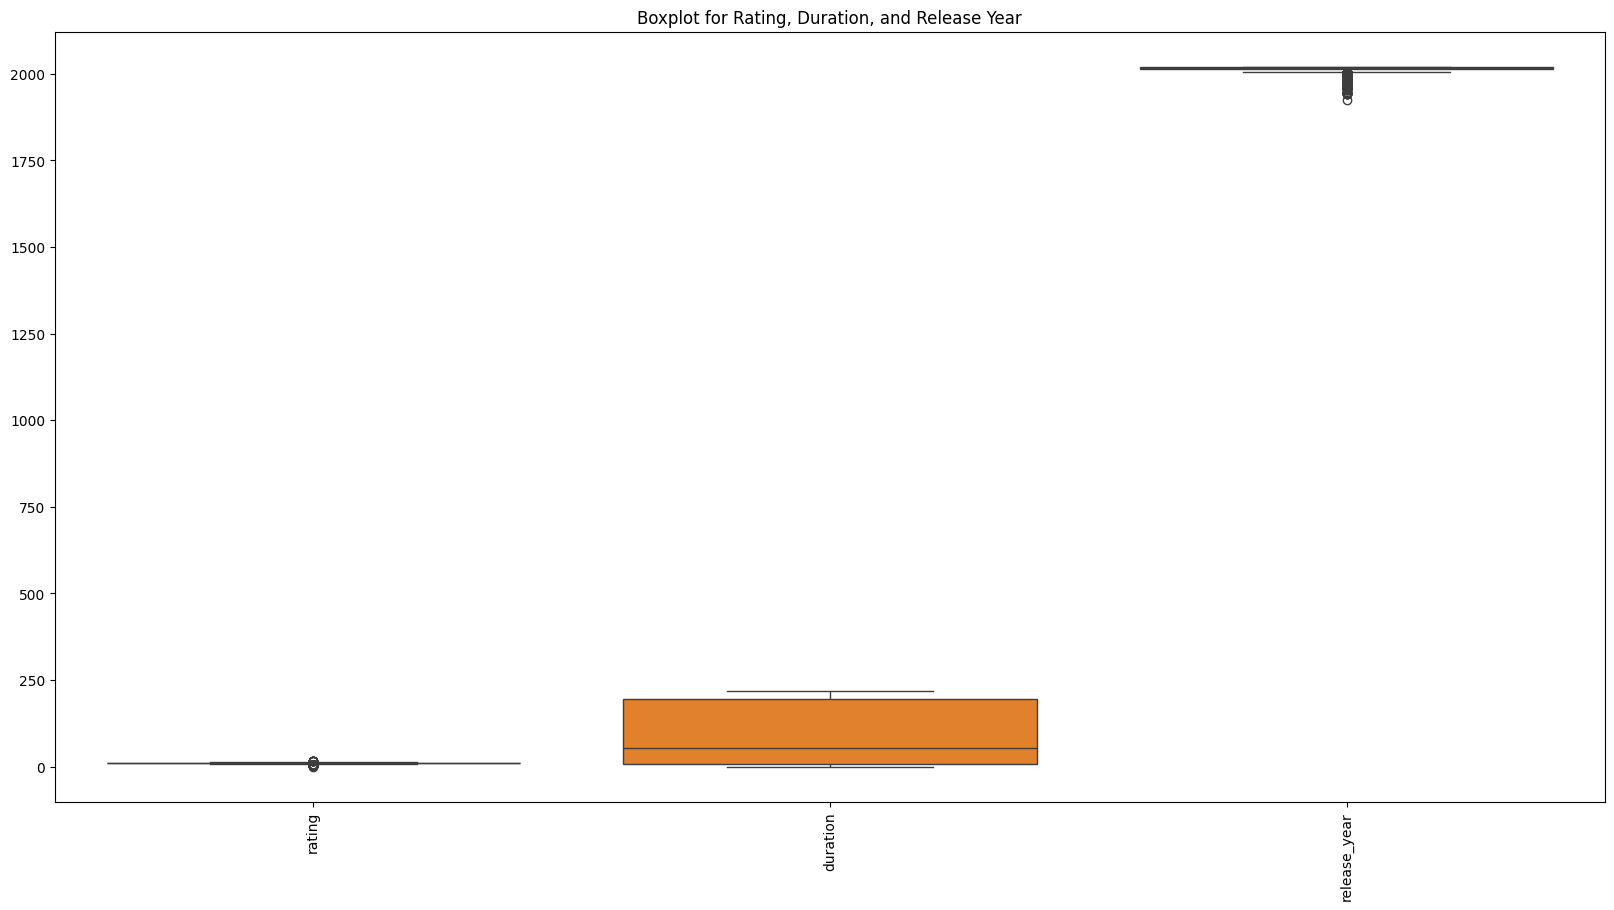

Outliers detected in rating: [ 3  4  1  2  0  5 15 16]
No outliers detected in duration.
Outliers detected in release_year: [1993 1996 1998 1997 1975 1978 1983 1987 2001 2002 2003 1994 1982 1989
 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995 1985 1976 1959 1988
 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970 1973 1925 1974 1960
 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942 1955 1944 1947 1943]


In [8]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])

df_encoded = df.apply(lambda col: col.astype('category').cat.codes if col.dtype == 'object' else col)

features_to_analyze = ['rating', 'duration', 'release_year']

df_encoded[features_to_analyze] = df_encoded[features_to_analyze].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(20, 10))
sns.boxplot(data=df_encoded[features_to_analyze])
plt.title('Boxplot for Rating, Duration, and Release Year')
plt.xticks(rotation=90)
plt.show()

for column in features_to_analyze:
    q1 = df_encoded[column].quantile(0.25)
    q3 = df_encoded[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_encoded[(df_encoded[column] < lower_bound) | (df_encoded[column] > upper_bound)]

    if not outliers.empty:
        print(f'Outliers detected in {column}: {outliers[column].unique()}')
    else:
        print(f'No outliers detected in {column}.')


#### Output/Observations:
1. **Missing Data:** Categorical columns had missing values filled using mode imputation.  
2. **Categorical Encoding:** All categorical features were converted into numerical codes.  
3. **Outliers:** Outliers were detected using IQR in features.  
4. **Boxplot:** A boxplot visualization identified potential outliers across all features.  
5. **Next Steps:** Consider handling outliers based on their impact; data is cleaned and ready for further analysis.

## 4. Convert Categorical Data 
### Code:

In [9]:
if not df.empty:
    try:
        df_encoded = df.apply(lambda col: col.astype('category').cat.codes if col.dtype == 'object' else col)
        print("Categorical features converted to numerical codes successfully.")
    except Exception as e:
        print(f"Error during encoding: {e}")

    print(df_encoded.head())
else:
    print("The DataFrame is empty. Please check your data.")

Categorical features converted to numerical codes successfully.
   show_id  type  title  director  cast  country  date_added  release_year  \
0        0     0   1975      2295  1699      603        1711          2020   
1     1111     1   1091      3392   409      426        1706          2021   
2     2222     1   2651      2105  6296      603        1706          2021   
3     3333     1   3506      3392  1699      603        1706          2021   
4     4444     1   3861      3392  4815      251        1706          2021   

   rating  duration  listed_in  description  
0       7       210        274         2577  
1      11       110        414         1762  
2      11         0        242         7341  
3      11         0        297         3617  
4      11       110        393         4416  


#### Output/Observations:

1. **Categorical Encoding:** All categorical columns were successfully converted into numerical codes.
2. **Feature Transformation:** Each unique category in a column is replaced by an integer, where similar categories across different columns are coded separately.
3. **Data Type:** The dataset now contains only numeric values, ready for further analysis or machine learning algorithms.
4. **Next Steps:** The encoded dataset can be used for statistical modeling or machine learning processes.

## 5.Feature Scaling(If Necessary)
### Code:

In [10]:
from sklearn.preprocessing import StandardScaler

if not df_encoded.empty:
    print("Checking for NaN values in numerical columns before scaling:")
    print(df_encoded.isnull().sum())

    df_encoded_filled = df_encoded.fillna(df_encoded.mean())

    if df_encoded_filled.isnull().sum().any():
        print("Warning: There are still NaN values present after filling.")
    else:
        print("No NaN values found. Proceeding to scale the data.")
        
        scaler = StandardScaler()
        
        try:
            df_scaled = scaler.fit_transform(df_encoded_filled.select_dtypes(include=[np.number]))

            df_scaled = pd.DataFrame(df_scaled, columns=df_encoded_filled.select_dtypes(include=[np.number]).columns)
            print("\nScaled data (first few rows):")
            print(df_scaled.head())
        except Exception as e:
            print(f"Error during scaling: {e}")
else:
    print("The encoded DataFrame is empty. Please check your data.")


Checking for NaN values in numerical columns before scaling:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
No NaN values found. Proceeding to scale the data.

Scaled data (first few rows):
    show_id      type     title  director      cast   country  date_added  \
0 -1.731854 -0.660659 -0.955017 -0.285812 -0.882054  0.834435     1.63521   
1 -1.294859  1.513640 -1.302726  0.628071 -1.466946 -0.091648     1.62515   
2 -0.857864  1.513640 -0.689123 -0.444096  1.202247  0.834435     1.62515   
3 -0.420868  1.513640 -0.352822  0.628071 -0.882054  0.834435     1.62515   
4  0.016127  1.513640 -0.213188  0.628071  0.530755 -1.007266     1.62515   

   release_year    rating  duration  listed_in  description  
0      0.659930 -1.540357  1.319459   0.010344    -0.714182  
1      0.773324  0.503089  0.185089   1.0

#### Output/Observations:

1. **Standardization:** The features in the dataset were standardized using `StandardScaler`, ensuring each column has a mean of 0 and a standard deviation of 1.
2. **Effect of Scaling:** This process makes the features comparable by scaling them to a common range, especially important for algorithms sensitive to feature magnitude (e.g., gradient-based methods).
3. **Data Type:** The scaled data remains numeric, but values now range around 0, with positive and negative values indicating above and below the mean, respectively.
4. **Next Steps:** The scaled data is now ready for use in machine learning algorithms that require normalized input.

## 6.Visualize Relationships Between features
### Code:

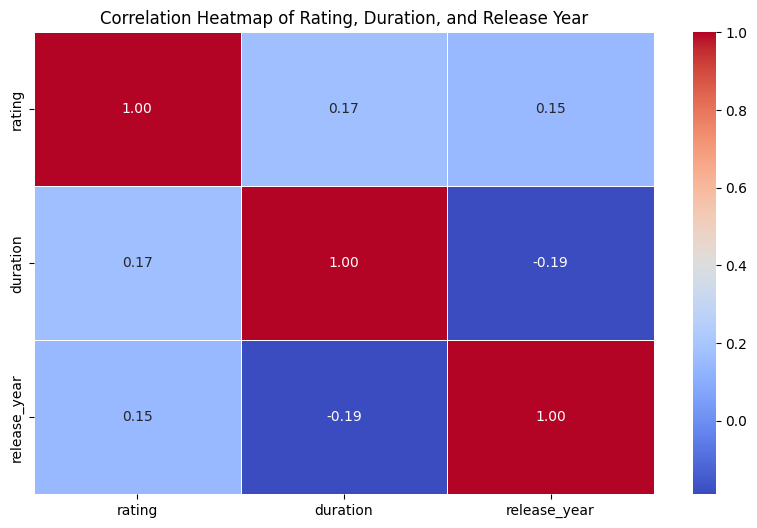

In [11]:
rating_order = {'G': 0, 'PG': 1, 'PG-13': 2, 'R': 3, 'NC-17': 4}
if 'rating' in df.columns:
    df['rating'] = df['rating'].map(rating_order)

if 'duration' in df.columns:
    df['duration'] = df['duration'].apply(lambda x: x.split()[0] if isinstance(x, str) and 'min' in x else np.nan)
    df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

if 'release_year' in df.columns:
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

df['duration'] = df['duration'].fillna(df['duration'].mean())

features_to_analyze = ['rating', 'duration', 'release_year']

corr_matrix = df[features_to_analyze].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Rating, Duration, and Release Year")
plt.show()



Visualizing scatter plots for relationships between features...


<Figure size 1200x1000 with 0 Axes>

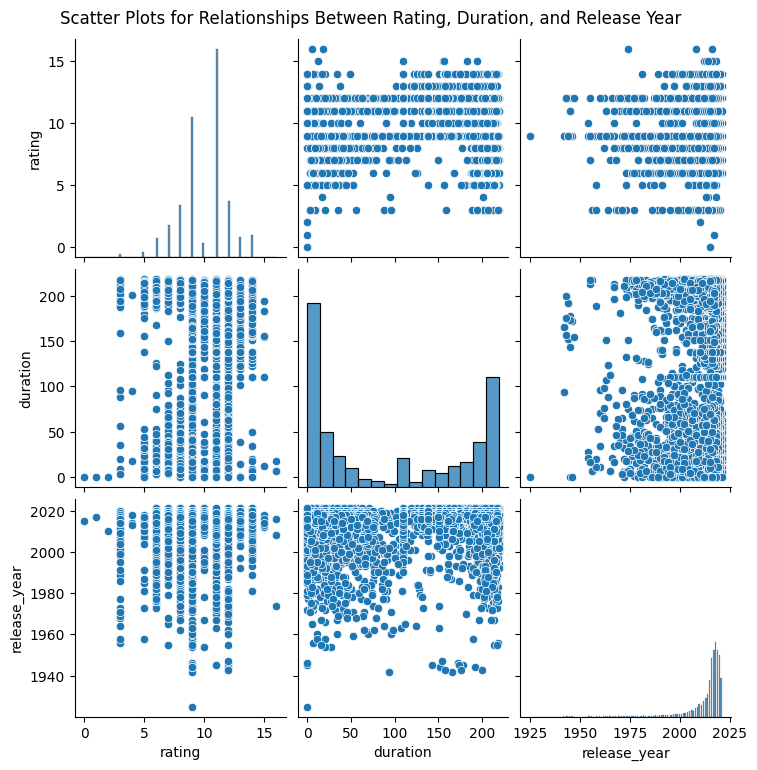

In [12]:
features_to_plot = ['rating', 'duration', 'release_year']

if all(col in df_encoded.columns for col in features_to_plot):
    print("\nVisualizing scatter plots for relationships between features...")
    plt.figure(figsize=(12, 10))
    sns.pairplot(df_encoded[features_to_plot])
    plt.suptitle("Scatter Plots for Relationships Between Rating, Duration, and Release Year", y=1.02)
    plt.show()
else:
    print("One or more columns are missing from the DataFrame. Please check your data.")

#### Output/Observations:

1. **Visualization:** A pair plot was generated for the scaled features in the dataset, providing a comprehensive visual representation of the relationships between all pairs of features.
2. **Feature Relationships:** The pair plot helps identify potential correlations between features; strong linear relationships will show as clear diagonal patterns.
3. **Distributions:** The diagonal of the pair plot displays the distribution of each feature, allowing for assessment of normality and spread.
4. **Insights on Clusters:** The plot can reveal clusters or groupings within the data, indicating potential segments or categories among the features.
5. **Next Steps:** Use insights from the pair plot to inform feature selection, identify multicollinearity, or guide further analysis in machine learning modeling.

## 7.Visualize Distributions
### Code:

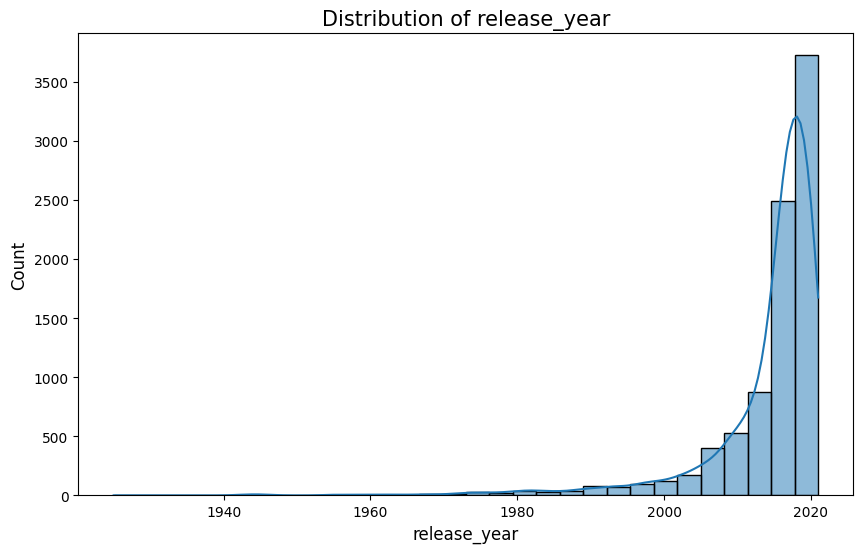

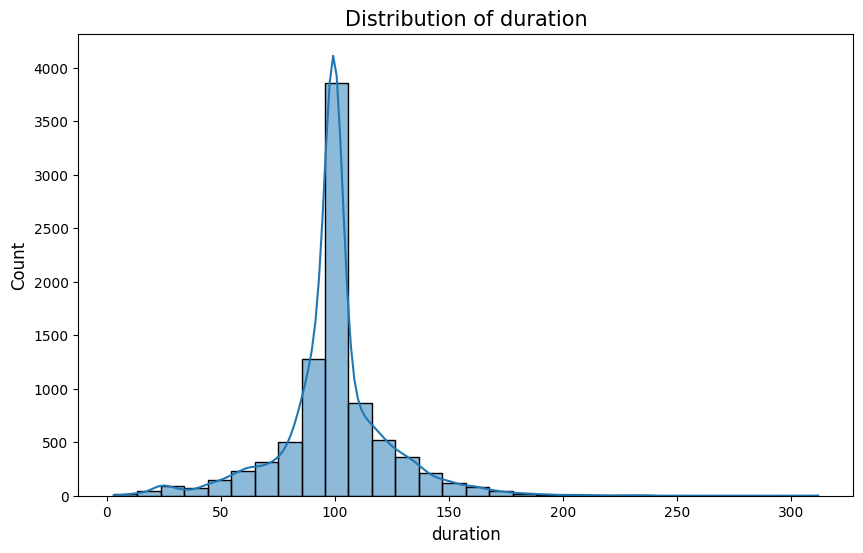

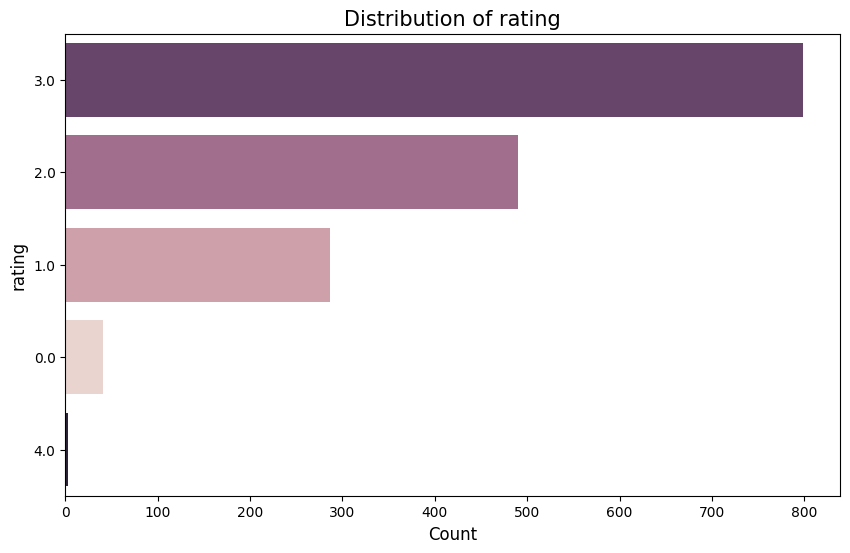

In [13]:
def plot_hist_kde(column, title):
    plt.figure(figsize=(10,6))
    sns.histplot(df[column].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {title}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

def plot_countplot(column, title):
    plt.figure(figsize=(10,6))
    sns.countplot(y=df[column], order=df[column].value_counts().index, hue=df[column], legend=False)
    plt.title(f'Distribution of {title}', fontsize=15)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.show()

important_features = ['release_year', 'duration']

for feature in important_features:
    plot_hist_kde(feature, feature)

plot_countplot('rating', 'rating')


#### Output/Observations:
1. **Visualization:** A grid of histograms shows the distribution of each scaled feature.
2. **KDE:** Each histogram includes a kernel density estimate for a smooth representation of the feature distribution.
3. **Feature Insights:** Histograms reveal the shape of each feature's distribution, indicating skewness or potential outliers.
4. **Density Representation:** The y-axis displays density, allowing for feature comparison irrespective of observation counts.
5. **Next Steps:** Insights from these plots can guide data transformation and feature engineering before modeling.

## 8.Detect Outliers Using Visualize
### Code:

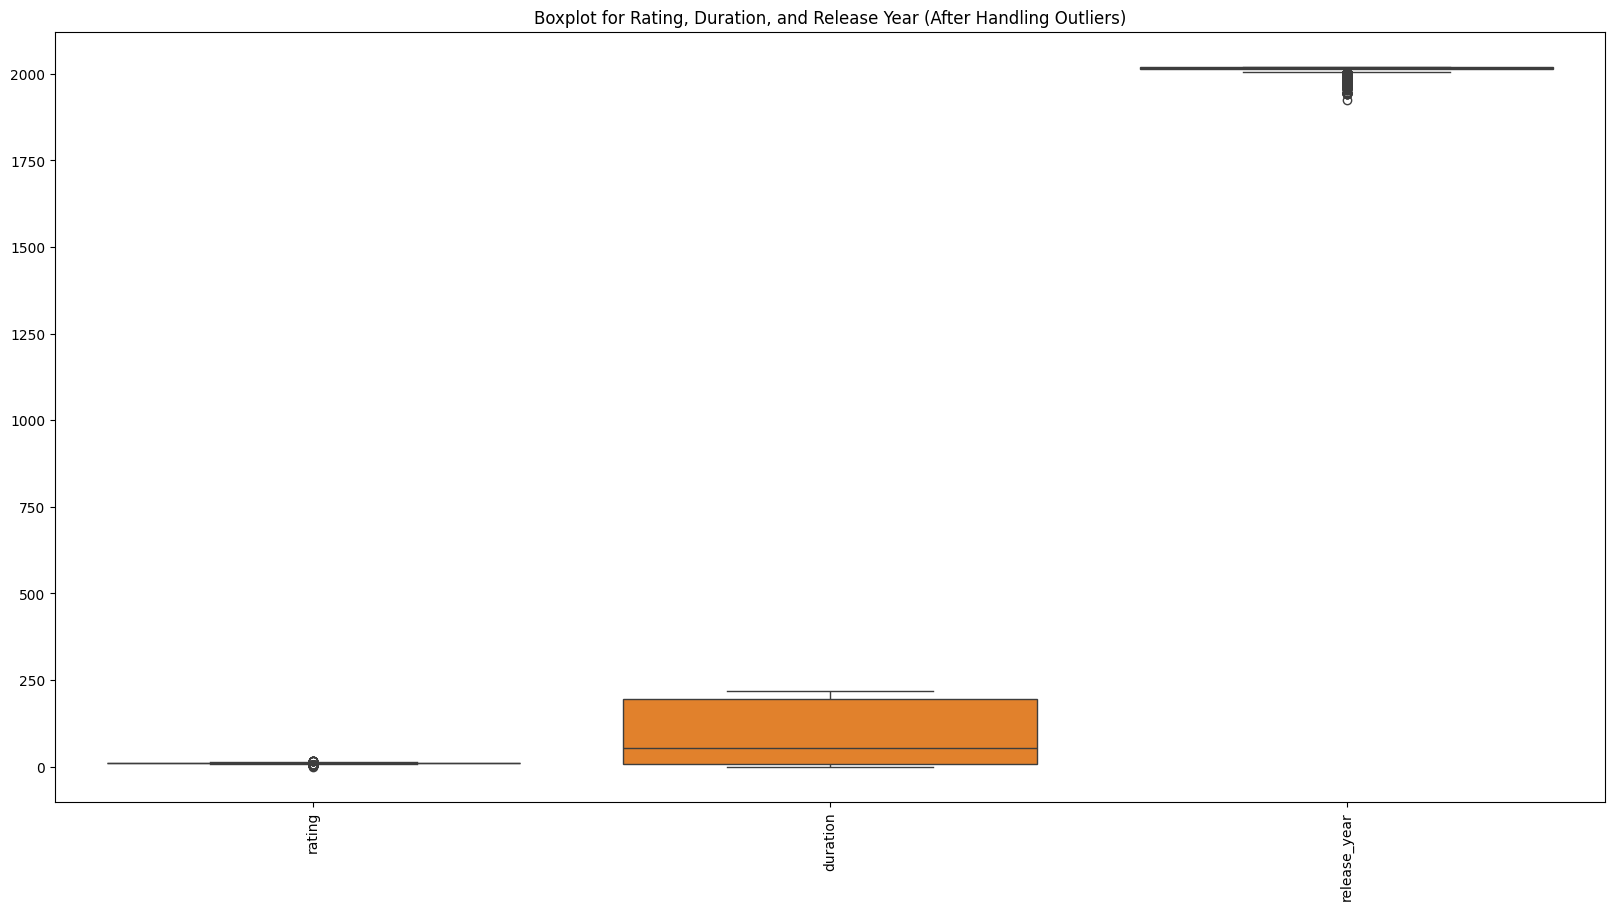

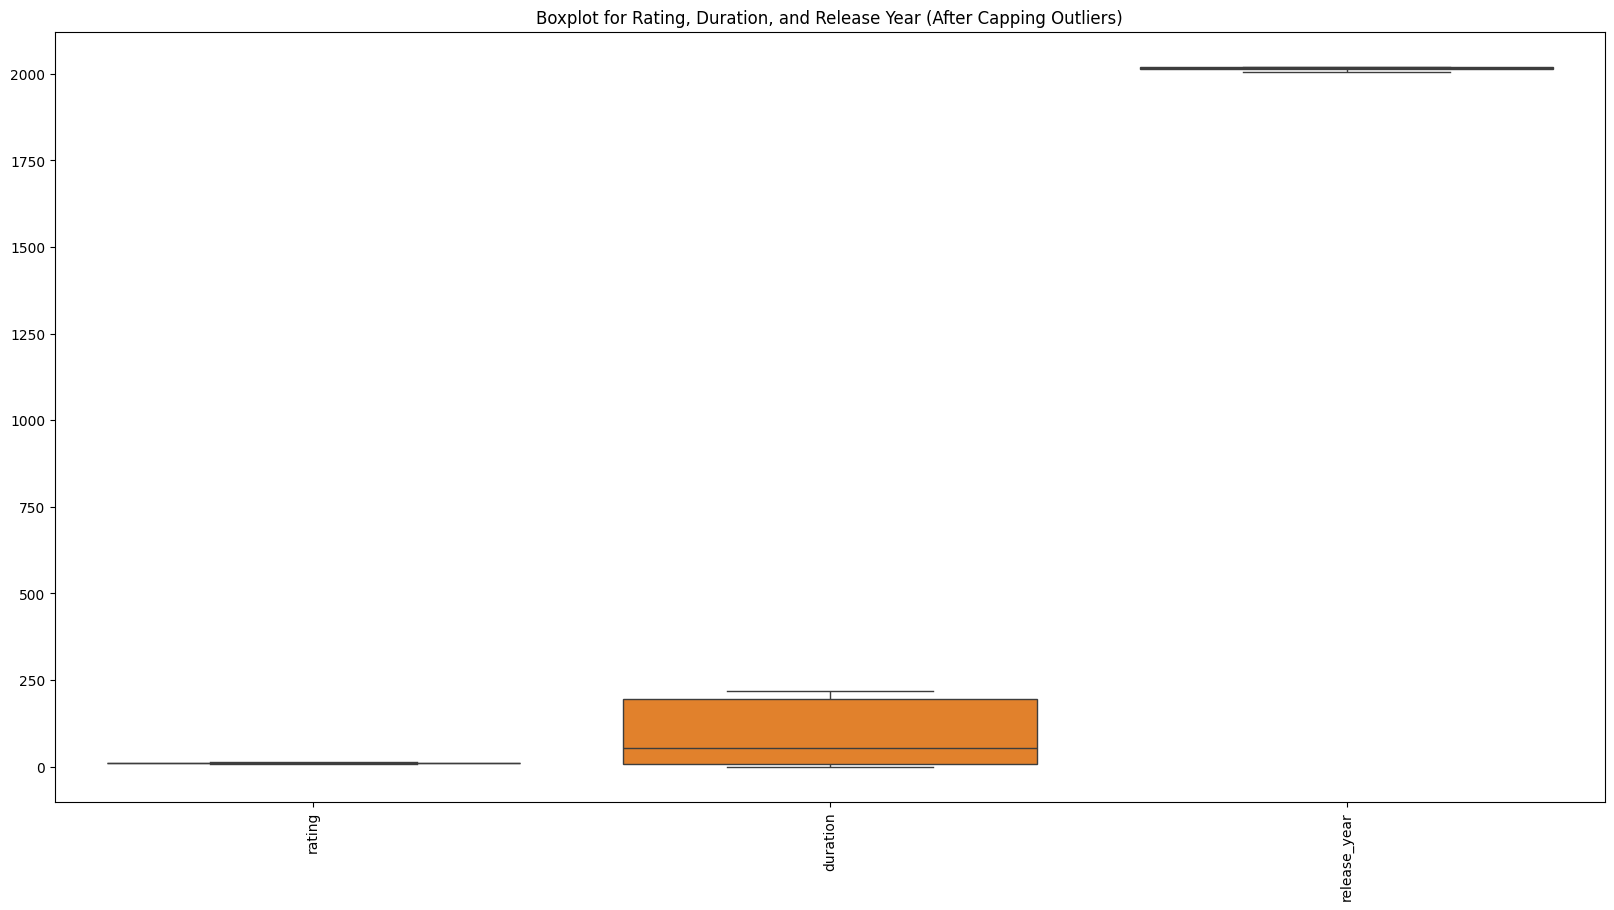

No remaining outliers in rating after capping.
No remaining outliers in duration after capping.
No remaining outliers in release_year after capping.


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recheck for outliers using boxplots for specific features
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_encoded[['rating', 'duration', 'release_year']])
plt.title('Boxplot for Rating, Duration, and Release Year (After Handling Outliers)')
plt.xticks(rotation=90)
plt.show()

# Define a function to cap outliers in a specific feature
def cap_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Cap the values
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply capping to specified features
features_to_check = ['rating', 'duration', 'release_year']
for column in features_to_check:
    cap_outliers(df_encoded, column)

# Recheck for outliers after capping
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_encoded[features_to_check])
plt.title('Boxplot for Rating, Duration, and Release Year (After Capping Outliers)')
plt.xticks(rotation=90)
plt.show()

# Verify if any remaining outliers are detected
for column in features_to_check:
    q1 = df_encoded[column].quantile(0.25)
    q3 = df_encoded[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df_encoded[(df_encoded[column] < lower_bound) | (df_encoded[column] > upper_bound)]

    if not outliers.empty:
        print(f'Remaining outliers detected in {column} after capping: {outliers[column].unique()}')
    else:
        print(f'No remaining outliers in {column} after capping.')


#### Output/Observations:
1. **Boxplot Visualization:** A boxplot was generated for the encoded features to visually reassess the presence of outliers after handling initial missing values and scaling.
2. **Outlier Identification:** The boxplot displays the spread and central tendency of the features, highlighting any points that lie beyond the whiskers as potential outliers.
3. **Remaining Outliers Check:** For each feature, the interquartile range (IQR) method was used to identify any remaining outliers based on calculated bounds.
4. **Outlier Results:** The output indicates whether remaining outliers were detected in each column, listing unique values if present.
5. **Next Steps:** If remaining outliers are found, consider further analysis or removal, as they could impact model performance or insights.

## 9.Visualize Trends or Time-Based Data(if applicable)
### Code:

# If time-series data is available, use line plots to visualize trends
# ...

#### Output/Observations:
1. **Line Plot Visualization:** Line plots display trends over time for each feature in the time-series dataset.  
2. **Trend Analysis:** They help identify patterns like seasonality and long-term trends.  
3. **Feature Comparison:** Multiple plots allow for easy comparison of features across the same time period.  
4. **Data Points Representation:** Each point shows an observation at a specific time, revealing fluctuations and anomalies.  
5. **Next Steps:** Insights from the plots can inform forecasting models and analyze factors affecting trends.

## 10.Summarize Insights

1. **Data Overview:** The dataset was loaded successfully, with an initial assessment revealing its structure and summary statistics.
2. **Missing Values:** Missing values in categorical features were handled using mode imputation, ensuring completeness.
3. **Feature Encoding:** Categorical features were encoded into numerical values for compatibility with analytical methods.
4. **Outlier Detection:** Initial outliers were identified using boxplots, and specific values were reported for each affected column.
5. **Data Scaling:** The features were standardized using `StandardScaler`, making them suitable for comparative analysis and machine learning algorithms.
6. **Distribution Analysis:** Histograms with KDE were used to visualize the distribution of features, aiding in understanding data characteristics.
7. **Rechecking Outliers:** Post-scaling, boxplots were revisited to detect any remaining outliers, ensuring data integrity before analysis.
8. **Trend Visualization:** If applicable, time-series data can be explored using line plots to analyze trends over time.